<a href="https://colab.research.google.com/github/AparnaBansal01/Court_Judge_Case/blob/main/Judges_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings                  
warnings.filterwarnings("ignore")

In [39]:
act_key = pd.read_csv("act_key.csv")
court_key = pd.read_csv("cases_court_key.csv")
district_key = pd.read_csv("cases_district_key.csv")
state_key = pd.read_csv("cases_state_key.csv")
judge = pd.read_csv("judges_clean.csv")

Data Pre processing

In [6]:
print("The Shape of Judge dataset :",judge.shape)
print("The Shape of State dataset :",state_key.shape)
print("The Shape of district dataset :",district_key.shape)
print("The Shape of court dataset :",court_key.shape)

The Shape of Judge dataset : (98478, 8)
The Shape of State dataset : (287, 5)
The Shape of district dataset : (632, 9)
The Shape of court dataset : (59428, 7)


In [ ]:
judge.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


In [ ]:
court_key.head()

,year,state_code,state_name,district_name,dist_code,court_no,court_name
0,2010,1,Maharashtra,Nandurbar,1,1,Chief Judcial Magistrate Nandurbar
1,2010,1,Maharashtra,Nandurbar,1,2,Civil Court Senior Division Nandurbar
2,2010,1,Maharashtra,Nandurbar,1,3,"DISTRICT AND SESSIONS COURT, NANDURBAR"
3,2010,1,Maharashtra,Nandurbar,1,4,Civil Court J.D. and J.M.F.C.Taloda
4,2010,1,Maharashtra,Nandurbar,1,5,Jt. Civil Court J.D. and J.M.F.C. Shahada


In [8]:
judge.describe()

,ddl_judge_id,state_code,dist_code,court_no
count,98478.000000,98478.000000,98478.000000,98478.000000
mean,49239.500000,9.981844,18.553748,46.726487
std,28428.294242,7.900817,14.205283,135.561819
min,1.000000,1.000000,1.000000,1.000000
25%,24620.250000,2.000000,8.000000,3.000000
50%,49239.500000,9.000000,16.000000,9.000000
75%,73858.750000,15.000000,26.000000,23.000000
max,98478.000000,30.000000,75.000000,999.000000


In [9]:
judge.isnull().sum()

ddl_judge_id          0
state_code            0
dist_code             0
court_no              0
judge_position        0
female_judge          1
start_date            0
end_date          18158
dtype: int64

In [40]:
Merged_Courtx = judge.dropna()
Merged_Courtx = Merged_Courtx.reset_index(drop = True)

In [10]:
judge.replace(r'^\s*$', np.nan, regex=True)

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018
...,...,...,...,...,...,...,...,...
98473,98474,30,2,9,criminal cases,1 female,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,1 female,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,1 female,09-12-2016,31-07-2017
98476,98477,30,2,10,criminal cases,1 female,15-05-2017,28-01-2019


In [11]:
judge['end_date'].fillna('00-00-0000', inplace=True)

In [12]:
judge.fillna('2 notconf', inplace = True)

In [15]:
court_key_u = court_key.drop('year', axis = 1)
court_key_u = court_key_u.drop_duplicates()
Merged_Court = pd.merge(judge, court_key_u, how = 'inner', on =['state_code', 'dist_code', 'court_no'])

In [14]:
Merged_Court.isnull().sum().sum()

0

In [16]:
Merged_Court.shape

(51395, 11)

In [17]:
Merged_Court.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar


In [18]:
district_key.head()

,year,state_code,state_name,dist_code,district_name,pc11_state_name,pc11_state_id,pc11_district_name,pc11_district_id
0,2010,2,Andhra Pradesh,7,Kadapa,andhra pradesh,28,NaN,NaN
1,2010,2,Andhra Pradesh,15,Nellore,andhra pradesh,28,NaN,NaN
2,2010,8,Bihar,10,Motihari,bihar,10,NaN,NaN
3,2010,8,Bihar,4,Saran at Chapra,bihar,10,NaN,NaN
4,2010,8,Bihar,28,Bettiah,bihar,10,NaN,NaN


In [19]:
district_key.isnull().sum()

year                   0
state_code             0
state_name             0
dist_code              0
district_name          0
pc11_state_name        0
pc11_state_id          0
pc11_district_name    97
pc11_district_id      97
dtype: int64

In [20]:
district_key['pc11_district_id'].fillna(0.0, inplace=True)

In [21]:
district_key['pc11_district_name'].fillna(district_key['district_name'], inplace=True)

In [22]:
district_key.head()

,year,state_code,state_name,dist_code,district_name,pc11_state_name,pc11_state_id,pc11_district_name,pc11_district_id
0,2010,2,Andhra Pradesh,7,Kadapa,andhra pradesh,28,Kadapa,0.0
1,2010,2,Andhra Pradesh,15,Nellore,andhra pradesh,28,Nellore,0.0
2,2010,8,Bihar,10,Motihari,bihar,10,Motihari,0.0
3,2010,8,Bihar,4,Saran at Chapra,bihar,10,Saran at Chapra,0.0
4,2010,8,Bihar,28,Bettiah,bihar,10,Bettiah,0.0


In [23]:
district_key_u = district_key.drop('year',axis=1)
district_key_u = district_key_u.drop_duplicates()
Merged_Court1 = pd.merge(Merged_Court, district_key_u, how = 'inner', on =['state_code', 'dist_code','state_name','district_name'])

In [24]:
Merged_Court1.shape

(51350, 15)

In [25]:
Merged_Court1.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name,pc11_state_name,pc11_state_id,pc11_district_name,pc11_district_id
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0


In [ ]:
state_key[200:210][:]

,year,state_code,state_name,pc11_state_name,pc11_state_id
200,2014,26,Delhi,nct of delhi,7
201,2013,26,Delhi,nct of delhi,7
202,2012,26,Delhi,nct of delhi,7
203,2017,26,Delhi,nct of delhi,7
204,2010,26,Delhi,nct of delhi,7
205,2018,26,Delhi,nct of delhi,7
206,2018,11,Orissa,odisha,21
207,2010,11,Orissa,odisha,21
208,2017,11,Orissa,odisha,21
209,2011,11,Orissa,odisha,21


In [26]:
state_key_u = state_key.drop('year',axis=1)
state_key_u = state_key_u.drop_duplicates()
Merged_Court2 = pd.merge(Merged_Court1, state_key_u, how ='inner', on = ['state_code',	'state_name',	'pc11_state_id',])

In [27]:
Merged_Court2.shape

(51350, 16)

In [ ]:
Merged_Court2.to_csv('Merged_key_Court.csv')

In [28]:
Merged_Court2.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name,pc11_state_name_x,pc11_state_id,pc11_district_name,pc11_district_id,pc11_state_name_y
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0,maharashtra
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0,maharashtra
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0,maharashtra
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0,maharashtra
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,maharashtra,27,nandurbar,497.0,maharashtra


In [35]:

from datetime import datetime

date_format = "%d-%m-%Y"
duration = []

In [41]:
for i in Merged_Courtx.index:
  duration.append((datetime.strptime(str(Merged_Courtx['end_date'][i]), date_format) - datetime.strptime(str(Merged_Courtx['start_date'][i]), date_format)).days)


Visualizing Data


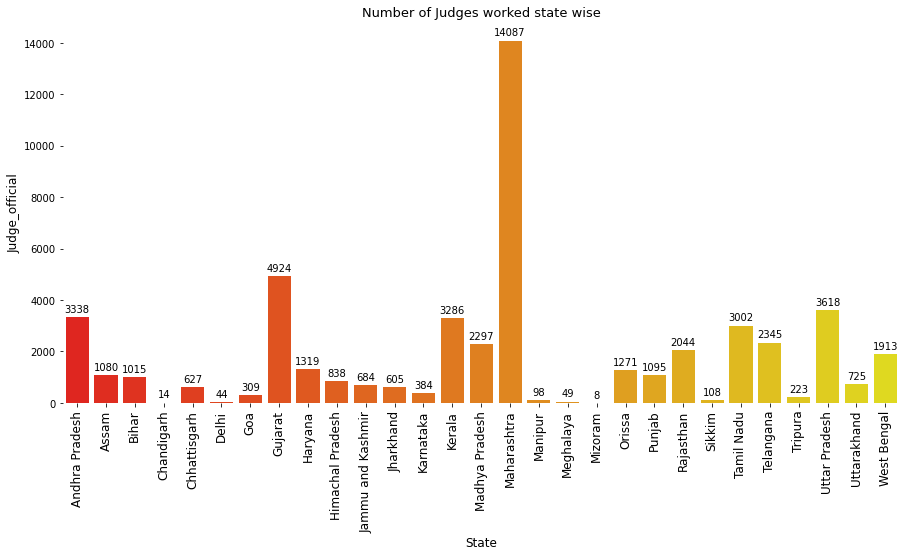

In [ ]:
fig=plt.figure(figsize=(15,7))
plt.xticks(rotation=90,fontsize=12)
plt.title('Number of Judges worked state wise',fontdict={'fontsize':13})
plots = sns.barplot(y = 'ddl_judge_id',  x='state_name', data=Merged_Court2.groupby('state_name').count().reset_index(),palette='autumn');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
plt.ylabel('Judge_official',fontdict={'fontsize':12})
plt.xlabel('State',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);
plt.show()

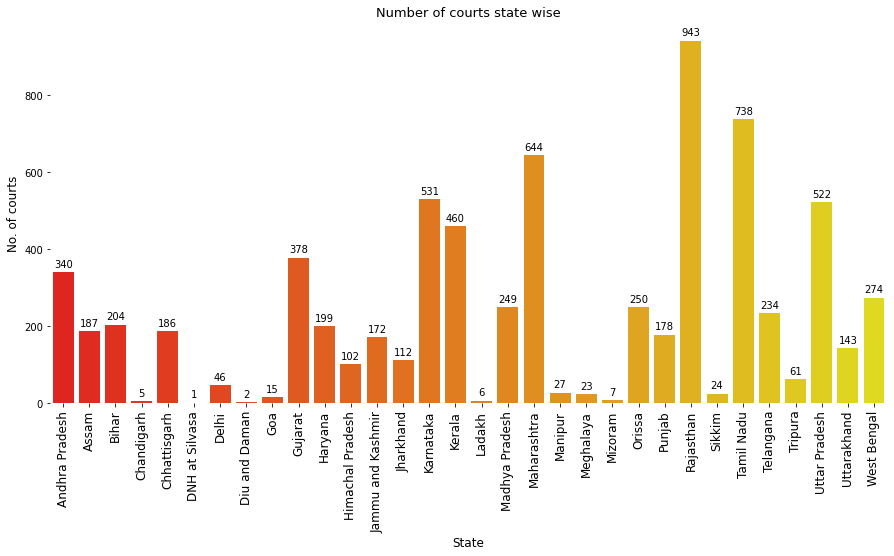

In [31]:
court_u = court_key.drop('year',axis=1)
court_u = court_u.drop_duplicates()
fig=plt.figure(figsize=(15,7))
plt.xticks(rotation=90,fontsize=12)
plt.title('Number of courts state wise',fontdict={'fontsize':13})
plots = sns.barplot(y = 'court_no',  x='state_name', data=court_u.groupby('state_name').count().reset_index(),palette='autumn');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
plt.ylabel('No. of courts',fontdict={'fontsize':12})
plt.xlabel('State',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);
plt.show()

In [32]:
Current_Merged = Merged_Court2[Merged_Court2['end_date'] == '00-00-0000']
Current_Merged.shape

(9074, 16)

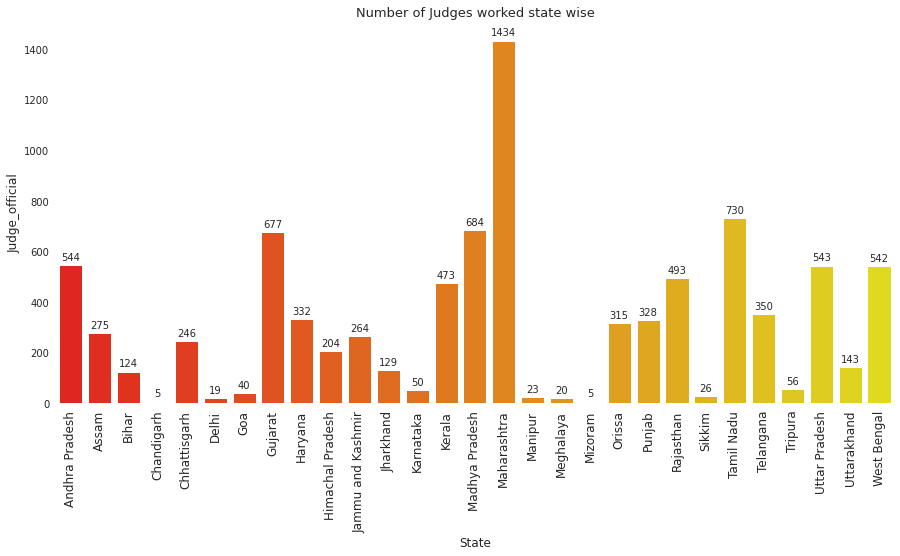

In [ ]:
fig=plt.figure(figsize=(15,7))
plt.xticks(rotation=90,fontsize=12)
plt.title('Number of Judges worked state wise',fontdict={'fontsize':13})
plots = sns.barplot(y = 'ddl_judge_id',  x='state_name', data=Current_Merged.groupby('state_name').count().reset_index(),palette='autumn');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
plt.ylabel('Judge_official',fontdict={'fontsize':12})
plt.xlabel('State',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);
plt.show()

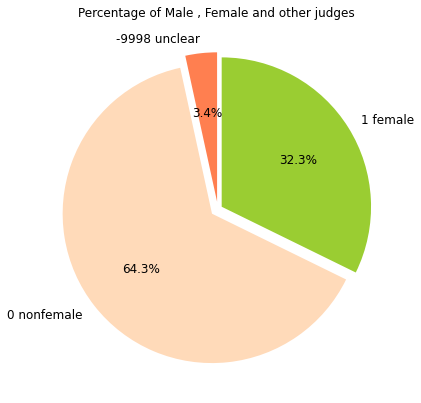

In [ ]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen']
plt.pie(Current_Merged.groupby(['female_judge']).ddl_judge_id.count(),
    labels=Current_Merged.groupby(['female_judge']).ddl_judge_id.count().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Percentage of Male , Female and other judges ')
plt.tight_layout()
plt.show()

In [ ]:
Current_Merged.judge_position.unique()

array(['chief judicial magistrate', 'civil judge junior division',
       'civil judge senior division', 'district and sessions court',
       'criminal cases', 'civil judge', 'judicial magistrate court',
       'civil court', 'motor accidents claims tribunal', 'railway ner',
       'small cause court', 'gram nyayalaya', 'additional district judge',
       'additional district and sessions court', 'jmfc',
       'commercial court', 'district and additional sessions court',
       'additional metropolitan magistrate',
       'chief metropolitan magistrate', 'junior division',
       'cantonment court', 'municipal court',
       'city district and sessions court', 'industrial court',
       'labour court', 'cooperative court', 'family court',
       'school tribunal', '2-district and sessions court',
       'jcj court, puttaparthy',
       '11-additional district and sessions court',
       '6-additional civil judge junior division',
       'jcj courts, satyavedu', 'principal civil judge

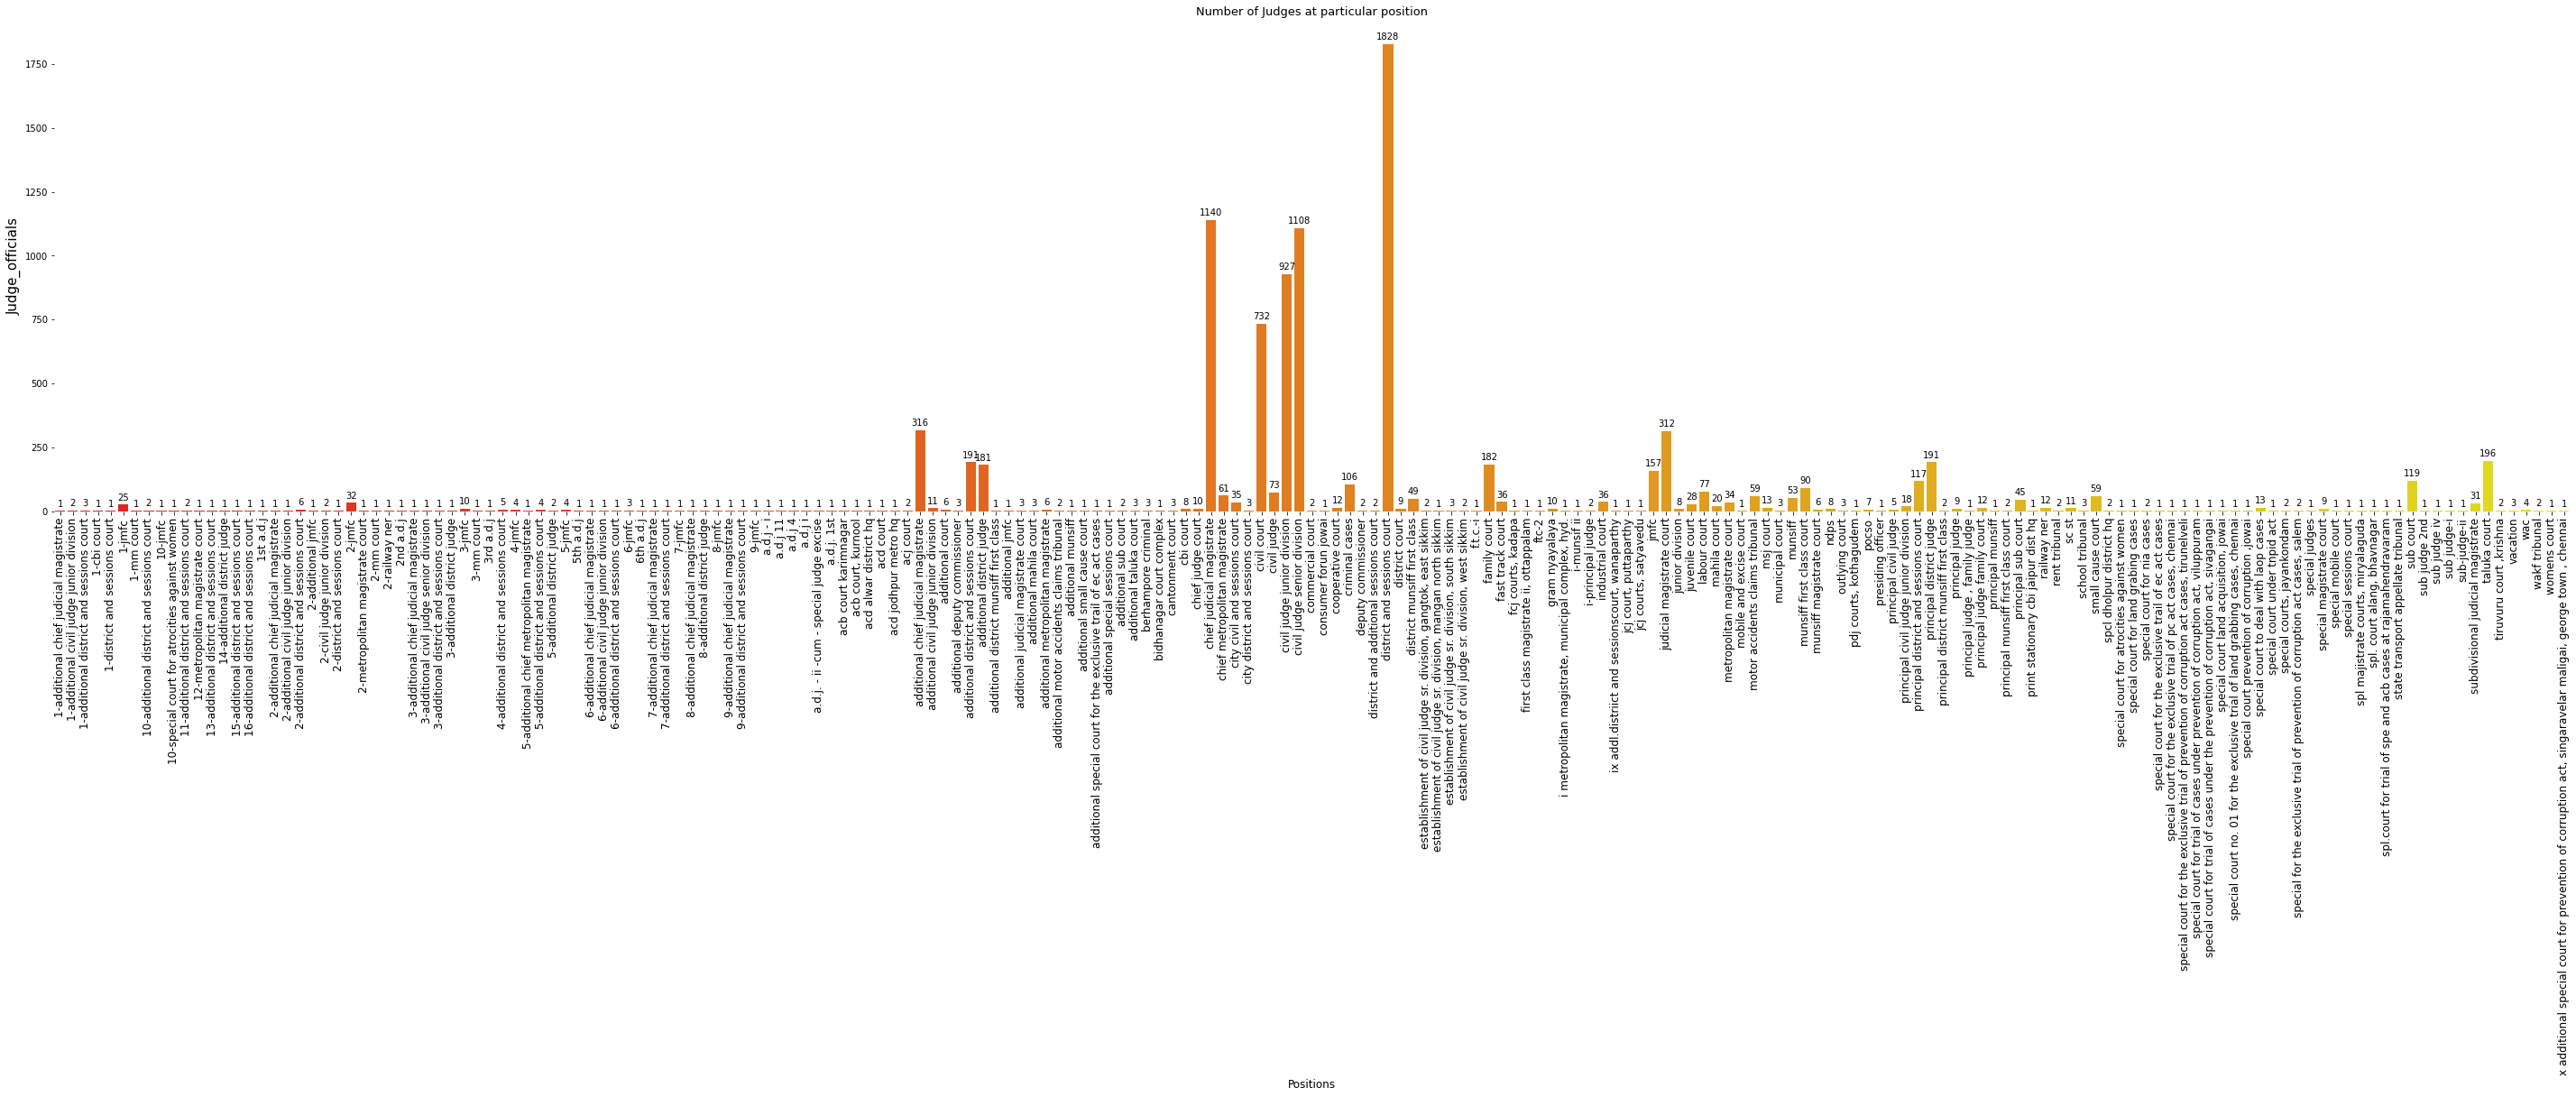

In [ ]:
fig = plt.figure()
fig.set_figwidth(50)
fig.set_figheight(10)
plt.xticks(rotation=90,fontsize=12)
plt.title('Number of Judges at particular position',fontdict={'fontsize':13})
plots = sns.barplot(y = 'ddl_judge_id',  x='judge_position', data=Current_Merged.groupby('judge_position').count().reset_index(),palette='autumn');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
plt.ylabel('Judge_officials',fontdict={'fontsize':15})
plt.xlabel('Positions',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);
plt.show()